## Qiskit Demo, Revision 3

Author: Brandon Kamaka <br>
Date: 2020 January 26<br>
Original Source: [IBM Index San Francisco](https://www.youtube.com/watch?v=LSA3pYZtRGg) <br>
Qiskit Version: 0.11<br>
Available [on Github](hhttps://github.com/ParanoydAndroid/Qiskit_Demo_3)<br>
Shortened Link: http://bit.ly/afitqiskit


## Purpose

### What this is <b>not<b>
    * A Python primer
    * a Jupyter Tutorial
    * A quantum mechanics tutorial
    
### What this is
    * Familiarization with Qiskit architecture
    * Jumpstart for future work

## Terra

Terra, the ‘earth’ element, is the foundation on which the rest of Qiskit lies. Terra provides a bedrock for composing quantum programs at the level of circuits and pulses, to optimize them for the constraints of a particular device, and to manage the execution of batches of experiments on remote-access devices. Terra defines the interfaces for a desirable end-user experience, as well as the efficient handling of layers of optimization, pulse scheduling and backend communication.

## Aer

Aer provides a high performance simulator framework for quantum circuits using the Qiskit software stack. It contains optimized C++ simulator backends for executing circuits compiled in Terra. Aer also provides tools for constructing highly configurable noise models for performing realistic noisy simulations of the errors that occur during execution on real devices.

## Ignis

Ignis, the ‘fire’ element, is dedicated to fighting noise and errors and to forging a new path. This includes better characterization of errors, improving gates, and computing in the presence of noise. Ignis is meant for those who want to design quantum error correction codes, or who wish to study ways to characterize errors through methods such as tomography, or even to find a better way for using gates by exploring dynamical decoupling and optimal control.

## Aqua

Aqua, the ‘water’ element, is the element of life. To make quantum computing live up to its expectations, we need to find real-world applications. Aqua is where algorithms for quantum computers are built. These algorithms can be used to build applications for quantum computing. Aqua is accessible to domain experts in chemistry, optimization, finance and AI, who want to explore the benefits of using quantum computers as accelerators for specific computational tasks.

Problems that may benefit from the power of quantum computing have been identified in numerous domains, such as Chemistry, Artificial Intelligence (AI), Optimization and Finance. Quantum computing, however, requires very specialized skills. To address the needs of the vast population of practitioners who want to use and contribute to quantum computing at various levels of the software stack, we have created Qiskit Aqua.

## Section 1: Setting up your IBM Account


In [52]:
# First, verify that you have the most recent version of qiskit installed
# version qiskit 11.x, as of this date.

import qiskit

qiskit.__qiskit_version__

# If you do not, then run the following command:

# !pip install qiskit --update


{'qiskit-terra': '0.11.0.dev0+89cb7af',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.3.0.dev0+a786cfb',
 'qiskit-ibmq-provider': '0.4.2',
 'qiskit-aqua': '0.7.0.dev0+40f5497',
 'qiskit': None}

In [ ]:
# If you have never configured an account before, or you have a v2 account but this is a new client,
# follow the instructions in this box on your first run only.

#from qiskit import IBMQ
# On your first run on a given client, and only your first run, you'll have to save your account
# API_TOKEN = 'INSERT YOUR IBM API TOKEN HERE'

# IBMQ.save_account(API_TOKEN)


In [53]:
%matplotlib inline

# For all programs on a v2 account that has previously been saved to this client, start here:

# In V2, all your access is bound to a single account/API token
# But backends are separated by "provider"
# We can load a (default) provider when we load our account
from qiskit import IBMQ
provider_public = IBMQ.load_account()

print(provider_public)

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


In [31]:
# Or we can load our account without selecting a provider, and then manually view and pick our providers

from qiskit import IBMQ

# First, let's see our providers:
IBMQ.load_account()  # If not already loaded
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-afrl', group='air-force-lab', project='educational')>]

In [32]:
provider_afrl = IBMQ.get_provider(hub='ibm-q-afrl')
provider_public = IBMQ.get_provider(hub='ibm-q')
# After selecting a provider, we can view the backends associated with it.
provider_public.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [33]:
backend = provider_public.get_backend('ibmq_vigo')
print(backend)

ibmq_vigo


## Section 2: Setting up a Bell State Circuit

In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

# Create our initial registers.  The name parameter is used by the circuit drawer
q = QuantumRegister(2, name='q')
meas = ClassicalRegister(2, name='m')

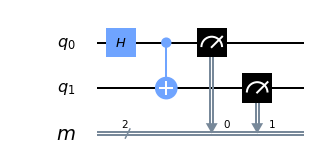

In [2]:
bell_state = QuantumCircuit(q, meas)

bell_state.h(q[0])
bell_state.cx(q[0], q[1])
bell_state.measure(q, meas)

bell_state.draw(output='mpl')


## Section 3: Basic Visualization

In [54]:
# Show text circuit.  Same as bv.draw(output='text')
bell_state.draw()

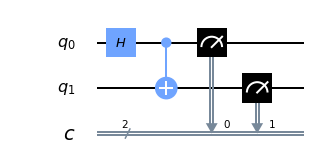

In [55]:
# Show matplotlib figure
%matplotlib inline

bell_state.draw(output='mpl')

# Or, without magic function

# fig = bv.draw(output='mpl')
# fig.show()

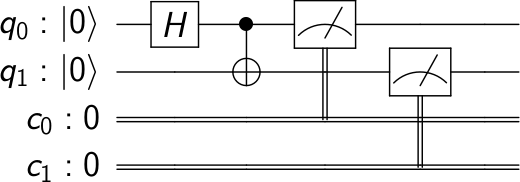

In [56]:
# Show Latex figure
bell_state.draw(output='latex')

In [57]:
#Show latex figure source
bell_state.draw(output='latex_source')

'% \\documentclass[preview]{standalone}\n% If the image is too large to fit on this documentclass use\n\\documentclass[draft]{beamer}\n% img_width = 4, img_depth = 6\n\\usepackage[size=custom,height=10,width=15,scale=0.7]{beamerposter}\n% instead and customize the height and width (in cm) to fit.\n% Large images may run out of memory quickly.\n% To fix this use the LuaLaTeX compiler, which dynamically\n% allocates memory.\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{amsmath}\n\\pdfmapfile{+sansmathaccent.map}\n% \\usepackage[landscape]{geometry}\n% Comment out the above line if using the beamer documentclass.\n\\begin{document}\n\\begin{equation*}\n    \\Qcircuit @C=1.0em @R=0.0em @!R {\n\t \t\\lstick{ q_{0} : \\ket{0} } & \\gate{H} & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\\n\t \t\\lstick{ q_{1} : \\ket{0} } & \\qw & \\targ & \\qw & \\meter & \\qw & \\qw\\\\\n\t \t\\lstick{c_{0}: 0} & \\cw & \\cw & \\cw \\cwx[-2] & \\cw & \\cw & \\cw\\\\\n\t \t\\lstick{c_{1}: 0} & \\cw & \\cw

## Section 5: Integrating Circuits

In [18]:
def get_bell_state():
    q = QuantumRegister(2, 'q')
    c = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(q, c)
    
    qc.h(q[0])
    qc.cx(q[0], q[1])
    qc.measure(q, c)
    
    return q, c, qc

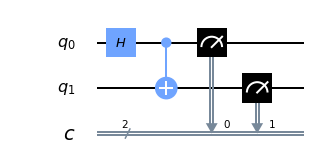

In [24]:
# Now let's go back to how our circuit is defined.  
# Maybe we want to improve our abstraction

q, c, bell_state = get_bell_state()
bell_state.draw(output='mpl')


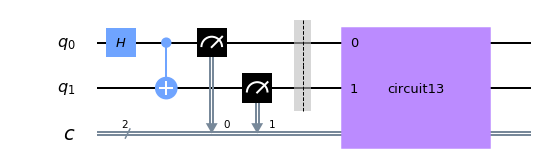

In [25]:
def bs_operator():
    _, _, qc = get_bell_state()
    
    return qc.to_instruction()
    
bell_state.barrier()
bell_state.append(bs_operator(), q, c)
bell_state.draw(output='mpl')

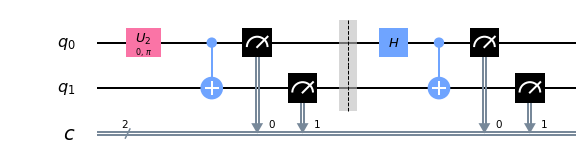

In [26]:
bell_state.decompose().draw(output='mpl')

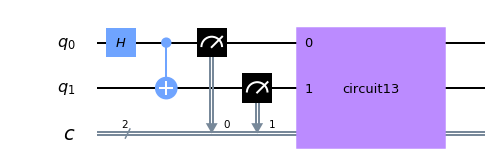

In [27]:
bell_state.draw(output='mpl', plot_barriers=False)

In [29]:
# We can even import our own (or a shared) circuit file!
from kamaka import *

q, c, bell_state = get_bell_state()
bell_state.append(saved_bs(), q, c)

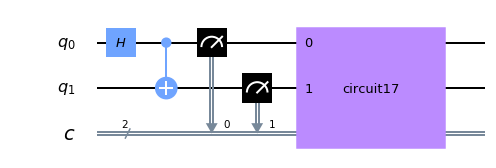

In [30]:
bell_state.draw(output='mpl', plot_barriers=False)

## Executing Jobs

In [34]:
# Now we run our circuit
# First, we need to know our backends.  We've already imported and accessed our remote backends
# But we can also use local simulators through Aer or BasicAer
# BasicAer provides a more limited functionality than Aer
from qiskit import Aer, BasicAer, execute   

print(Aer.backends())
backend_local_sim = Aer.get_backend(name='qasm_simulator')

[<QasmSimulator('qasm_simulator') from AerProvider()>, <StatevectorSimulator('statevector_simulator') from AerProvider()>, <UnitarySimulator('unitary_simulator') from AerProvider()>]


In [36]:
# Now we execute
_, _, bell_state = get_bell_state()
job = execute(bell_state, backend_local_sim)

# result() is synchronous, and therefore blocks until a result is ready.
# We show below a way to avoid calling result() until the job is complete
result = job.result()
counts = result.get_counts()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.4.0', date=datetime.datetime(2020, 1, 28, 10, 29, 37, 80147), header=Obj(backend_name='qasm_simulator', backend_version='0.4.0'), job_id='171a4a12-2cc5-40b4-b551-f06fd3052d0e', metadata={'max_memory_mb': 8114, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0029165}, qobj_id='eafdf0e4-ef68-4c41-978a-6781f0d6b9b7', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=514, 0x3=510)), header=Obj(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], memory_slots=2, n_qubits=2, name='circuit18', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=1839531797, shots=1024, status='DONE', success=True, time_taken=0.0027074)], status='COMPLETED', success=True, time_taken=0.009000301361083984)


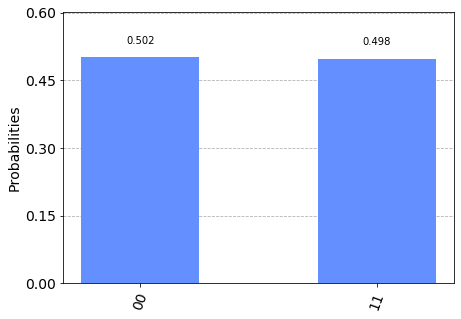

In [37]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

In [38]:
%%capture
# We import a job_monitor to see the status of remote jobs (queued, running, complete)
from qiskit.tools.monitor import job_monitor

shots = 512  # Number of times to re-run the experiment
max_credits = 5  # Maximum cost you're willing to incur
job = execute(bell_state, backend, shots=shots, max_credits=max_credits)

job_monitor(job)

Job Status: job is actively running

NameError: name 'real_backend' is not defined

Job Status: job has successfully run


In [39]:
# We can also save a job ID and use it to retrieve previous or queued jobs
jobID = job.job_id()
print(f'Job ID: {jobID}')
new_job = backend.retrieve_job(jobID)

Job ID: 5e3053cb808c110018104ed5


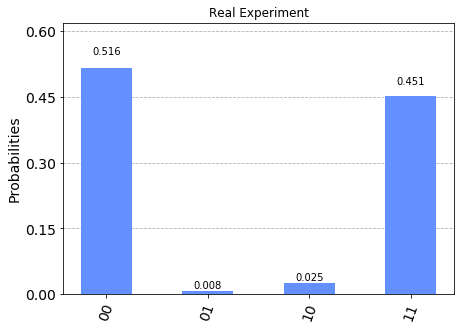

In [40]:
from qiskit.tools.visualization import plot_histogram

# Once the monitor confirms the job is complete, we call result()
result = job.result()
counts = result.get_counts()
plot_histogram(counts, title='Real Experiment')

## Section 6: Using Other Sims

In [44]:
# Lets do a bell state circuit, but no measurements

q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
bs = QuantumCircuit(q, c)

bs.h(q[0])
bs.cx(q[0], q[1])



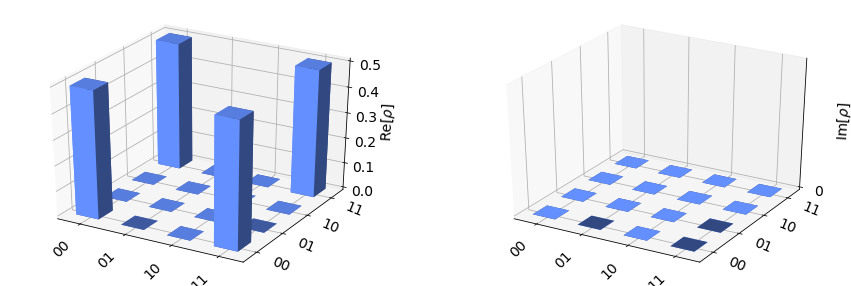

In [45]:
# Getting state vectors
from qiskit.tools.visualization import plot_state_city, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector
sv_backend = Aer.get_backend('statevector_simulator')
result = execute(bs, sv_backend).result()
vec = result.get_statevector(bs)
plot_state_city(vec)

In [46]:
# Getting Matrices
# Cannot have a measurement gate in your circuit

unitary_backend = Aer.get_backend('unitary_simulator')
job = execute(bs, unitary_backend)
result = job.result()

matrix = result.get_unitary(bs)

print('Resulting Unitary Matrix:\n')
print(matrix)


Resulting Unitary Matrix:

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


## Miscellaneous

In [47]:
# To check your backend status before using it

backend.status()

BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=0, status_msg='active')

In [49]:
# Contains, among other things, the coupling map for the backend
backend.configuration()

QasmBackendConfiguration(allow_object_storage=True, allow_q_circuit=False, allow_q_object=True, backend_name='ibmq_vigo', backend_version='1.0.2', basis_gates=['u1', 'u2', 'u3', 'cx', 'id'], conditional=False, coupling_map=[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]], credits_required=True, description='5 qubit device Vigo', gates=[GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='id', parameters=[], qasm_def='gate id q { U(0,0,0) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u1', parameters=['lambda'], qasm_def='gate u1(lambda) q { U(0,0,lambda) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u2', parameters=['phi', 'lambda'], qasm_def='gate u2(phi,lambda) q { U(pi/2,phi,lambda) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u3', parameters=['theta', 'phi', 'lambda'], qasm_def='gate u3(theta,phi,lambda) q { U(theta,phi,lambda) q; }'), GateConfig(coupling_map=[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1]

In [51]:
backend.properties()

BackendProperties(_gates={'id': {(0,): {'gate_error': (0.0003872470037591274, datetime.datetime(2020, 1, 28, 8, 28, 36, tzinfo=datetime.timezone.utc)), 'gate_length': (3.555555555555556e-08, datetime.datetime(2020, 1, 28, 9, 53, 38, tzinfo=datetime.timezone.utc))}, (1,): {'gate_error': (0.00034859609439829317, datetime.datetime(2020, 1, 28, 8, 28, 36, tzinfo=datetime.timezone.utc)), 'gate_length': (3.555555555555556e-08, datetime.datetime(2020, 1, 28, 9, 53, 38, tzinfo=datetime.timezone.utc))}, (2,): {'gate_error': (0.000524759246970973, datetime.datetime(2020, 1, 28, 8, 28, 36, tzinfo=datetime.timezone.utc)), 'gate_length': (3.555555555555556e-08, datetime.datetime(2020, 1, 28, 9, 53, 38, tzinfo=datetime.timezone.utc))}, (3,): {'gate_error': (0.000605456945867889, datetime.datetime(2020, 1, 28, 8, 28, 36, tzinfo=datetime.timezone.utc)), 'gate_length': (3.555555555555556e-08, datetime.datetime(2020, 1, 28, 9, 53, 38, tzinfo=datetime.timezone.utc))}, (4,): {'gate_error': (0.001417450418

# Questions?